In [1]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import copy
import matplotlib.pyplot as plt
import constants as pc

In [2]:
# import a code file hydro3.py
import hydro3

# define a dictionary with some arguments that we will pass to the hydrodynamics code
# the "hnames" and "htype" arguments mean we are using a solution for a massive star from Heger & Woosley
# it has "zero" metallicity, meaning it will be a blue supergiant star

# noplot means we aren't going to draw plots as the code runs, which makes it faster
args = {'hname':'z11.0','htype':'zero','noplot':1,'t_stop':2.5e2}

# define the variable h which is a "lagrange_hydro_1d" object (instance of a class)
h = hydro3.lagrange_hydro_1d(**args)

# this tells the hydro code that we are using a Heger & Woosley star (e.g., so that it knows how to read the file)
h.itype=h.HEGER

In [3]:
# variables stored within our object h are accessed by h.variable_name
# use your past labs and class notebooks, the hydro code notes, and class slides for help!
h.bctype=[h.INFLOW, h.OUTFLOW]
h.setup_initial_conditions()
h.initialize_boundary_conditions()

header:  ['grid', 'cell', 'outer', 'total', 'mass', 'cell', 'outer', 'radius', 'cell', 'outer', 'velocity', 'cell', 'density', 'cell', 'temperature', 'cell', 'pressure', 'cell', 'specific', 'energy', 'cell', 'specific', 'entropy', 'cell', 'angular', 'velocity', 'cell', 'A_bar', 'cell', 'Y_e', 'stability', 'NETWORK', 'neutrons', 'H1', 'He3', 'He4', 'C12', 'N14', 'O16', 'Ne20', 'Mg24', 'Si28', 'S32', 'Ar36', 'Ca40', 'Ti44', 'Cr48', 'Fe52', 'Fe54', 'Ni56', 'Fe56', "'Fe'"]
r inner:  270890497.82996696


gzip: heger_progenitors/zero/z11.0 already exists;	not overwritten
gzip: heger_progenitors/zero/z11.0.gz already exists;	not overwritten


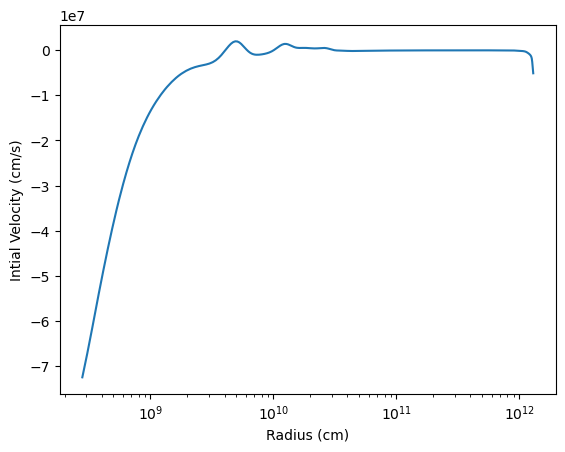

In [5]:
plt.semilogx(h.zones.r, h.zones.v)
plt.xlabel('Radius (cm)')
plt.ylabel('Intial Velocity (cm/s)');

In [5]:
U = 1e51          # create a variable for the initial energy
V = ((4/3) * np.pi * (h.zones.r[5])**3)      # calculate total volume 
u = U/V        # calculate internal energy density

rho = h.zones.d[5]       # calculate density of the first five zones
e = u / rho        # calculate energy per unit mass

h.zones.e[:5] = e   # distribute the initial energy per unit mass to the first 5 zones

In [6]:
h.run()

     0 0.000e+00 1.940e-03
2.974e+33 1.100e+01 3.113e+47 6.251e+50 -2.502e+50 3.752e+50
   100 3.869e-02 2.922e-04
2.974e+33 1.100e+01 1.203e+50 5.972e+50 -2.446e+50 4.729e+50
   200 6.133e-02 1.692e-04
2.974e+33 1.100e+01 2.227e+50 6.410e+50 -2.375e+50 6.261e+50
   300 7.686e-02 1.546e-04
2.974e+33 1.100e+01 2.804e+50 6.656e+50 -2.325e+50 7.135e+50


/home/phdo8065/astr3400/Final Project/hydro3.py:502: RuntimeWarning: divide by zero encountered in divide
  new_d = self.zones.mass/self.zones.vol
/home/phdo8065/astr3400/Final Project/hydro3.py:527: RuntimeWarning: invalid value encountered in multiply
  self.zones.p = (self.gamma - 1)*new_e*new_d


   400 9.388e-02 1.933e-04
2.974e+33 1.100e+01 3.483e+50 6.708e+50 -2.271e+50 7.919e+50
   500 1.133e-01 1.734e-04
2.974e+33 1.100e+01 4.190e+50 6.846e+50 -2.211e+50 8.825e+50
   600 1.312e-01 1.915e-04
2.974e+33 1.100e+01 4.798e+50 7.058e+50 -2.157e+50 9.699e+50
   700 1.506e-01 1.696e-04
2.974e+33 1.100e+01 5.463e+50 7.323e+50 -2.100e+50 1.068e+51
   800 1.668e-01 1.594e-04
2.974e+33 1.100e+01 5.973e+50 7.499e+50 -2.056e+50 1.142e+51
   900 1.829e-01 1.559e-04
2.974e+33 1.100e+01 6.474e+50 7.596e+50 -2.014e+50 1.206e+51
  1000 1.986e-01 1.529e-04
2.974e+33 1.100e+01 6.870e+50 7.764e+50 -1.975e+50 1.266e+51
  1100 2.128e-01 1.339e-04
2.974e+33 1.100e+01 7.203e+50 7.932e+50 -1.941e+50 1.319e+51
  1200 2.266e-01 1.489e-04
2.974e+33 1.100e+01 7.600e+50 8.025e+50 -1.909e+50 1.372e+51
  1300 2.432e-01 1.913e-04
2.974e+33 1.100e+01 8.107e+50 8.106e+50 -1.873e+50 1.434e+51
  1400 2.631e-01 2.099e-04
2.974e+33 1.100e+01 8.701e+50 8.196e+50 -1.831e+50 1.507e+51
  1500 2.842e-01 2.053e-04
2.974

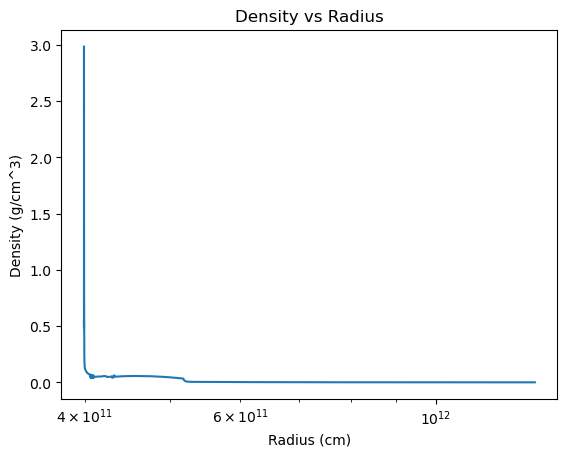

In [7]:
plt.semilogx(h.zones.r, h.zones.d)
plt.title('Density vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Density (g/cm^3)');

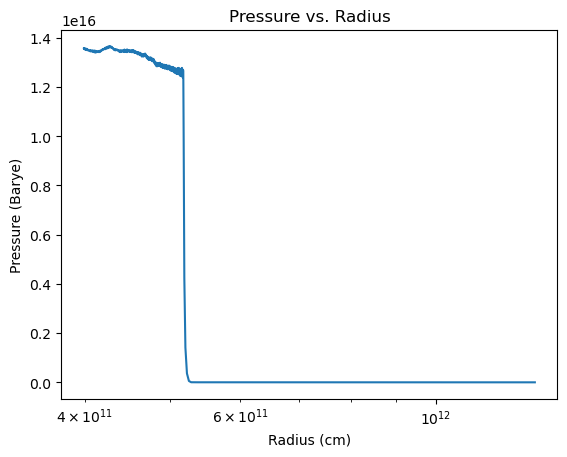

In [8]:
plt.semilogx(h.zones.r, h.zones.p)
plt.title('Pressure vs. Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Pressure (Barye)');

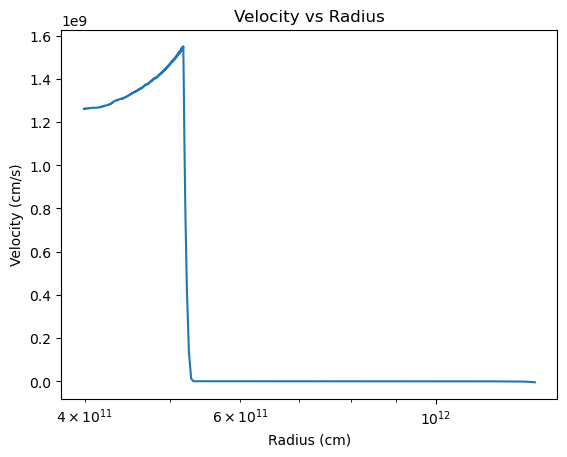

In [9]:
plt.semilogx(h.zones.r, h.zones.v)
plt.title('Velocity vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Velocity (cm/s)');

In [10]:
h.t_stop=h.t*2.
h.run()

437100 2.500e+02 7.056e-04
2.974e+33 1.100e+01 1.546e+52 1.248e+52 -3.173e+49 2.791e+52
437200 2.501e+02 7.055e-04
2.974e+33 1.100e+01 1.546e+52 1.248e+52 -3.173e+49 2.791e+52
437300 2.501e+02 7.055e-04
2.974e+33 1.100e+01 1.546e+52 1.248e+52 -3.172e+49 2.791e+52
437400 2.502e+02 7.056e-04
2.974e+33 1.100e+01 1.546e+52 1.248e+52 -3.172e+49 2.791e+52
437500 2.503e+02 7.056e-04
2.974e+33 1.100e+01 1.547e+52 1.248e+52 -3.171e+49 2.792e+52
437600 2.504e+02 7.056e-04
2.974e+33 1.100e+01 1.547e+52 1.248e+52 -3.170e+49 2.792e+52
437700 2.504e+02 7.056e-04
2.974e+33 1.100e+01 1.547e+52 1.248e+52 -3.170e+49 2.792e+52
437800 2.505e+02 7.056e-04
2.974e+33 1.100e+01 1.547e+52 1.248e+52 -3.169e+49 2.792e+52
437900 2.506e+02 7.056e-04
2.974e+33 1.100e+01 1.548e+52 1.248e+52 -3.169e+49 2.793e+52
438000 2.506e+02 7.055e-04
2.974e+33 1.100e+01 1.548e+52 1.248e+52 -3.168e+49 2.793e+52
438100 2.507e+02 7.055e-04
2.974e+33 1.100e+01 1.548e+52 1.248e+52 -3.168e+49 2.793e+52
438200 2.508e+02 7.055e-04
2.974

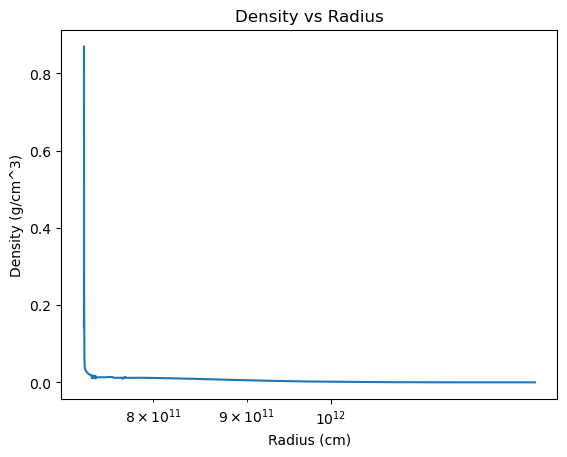

In [11]:
plt.semilogx(h.zones.r, h.zones.d)
plt.title('Density vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Density (g/cm^3)');

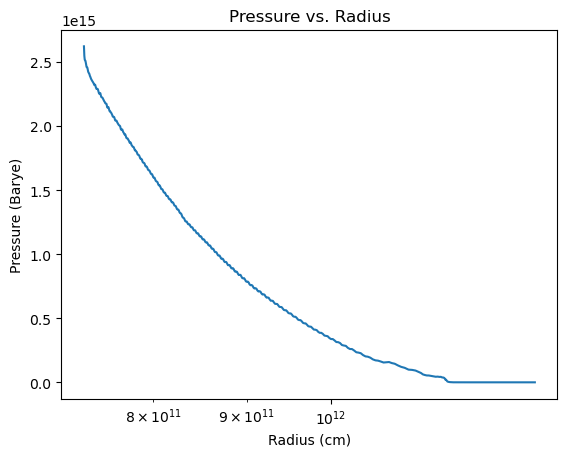

In [12]:
plt.semilogx(h.zones.r, h.zones.p)
plt.title('Pressure vs. Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Pressure (Barye)');

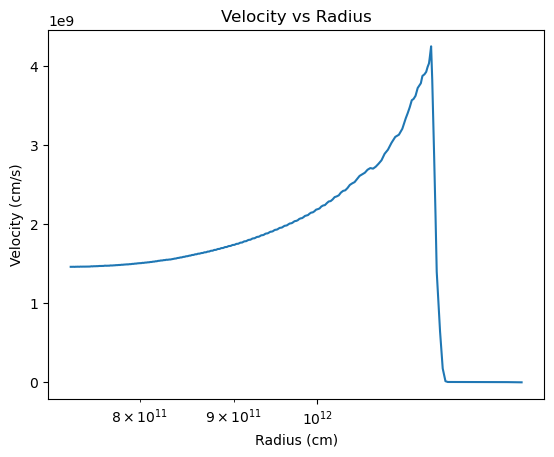

In [13]:
plt.semilogx(h.zones.r, h.zones.v)
plt.title('Velocity vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Velocity (cm/s)');